In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn import metrics
%matplotlib inline

###### EDA

In [50]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [51]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


df.describe digunakan untuk mengetahui parameter statistik dari dataset, antara lain : mean, nilai minimum, nilai maximum, standard devias, dll.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


df.info digunakan untuk mengetahui info dasar dari dataframe, jumlah variabel dan observasi, type data, jumlah data null

In [53]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Jumlah Missing Value pada tiap variabel bernilai 0 atau tidak ada nilai yang hilang disetiap kolom namun ada juga yang bernilai 201. isna()digunakan untuk mendeteksi missing value pada data, apabila pada data terdapat nilai 0 maka tidak akan terdeteksi sebagai missing value, sebab missing value tidak sama dengan 0. 

In [54]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

df.columns digunakan untuk mengetahui nama dan jumlah kolom dataset

In [55]:
col=data.columns.to_list()
col

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

data.columns.to_list() berisi tentang nama kolom dataset namun dibuat list-listan

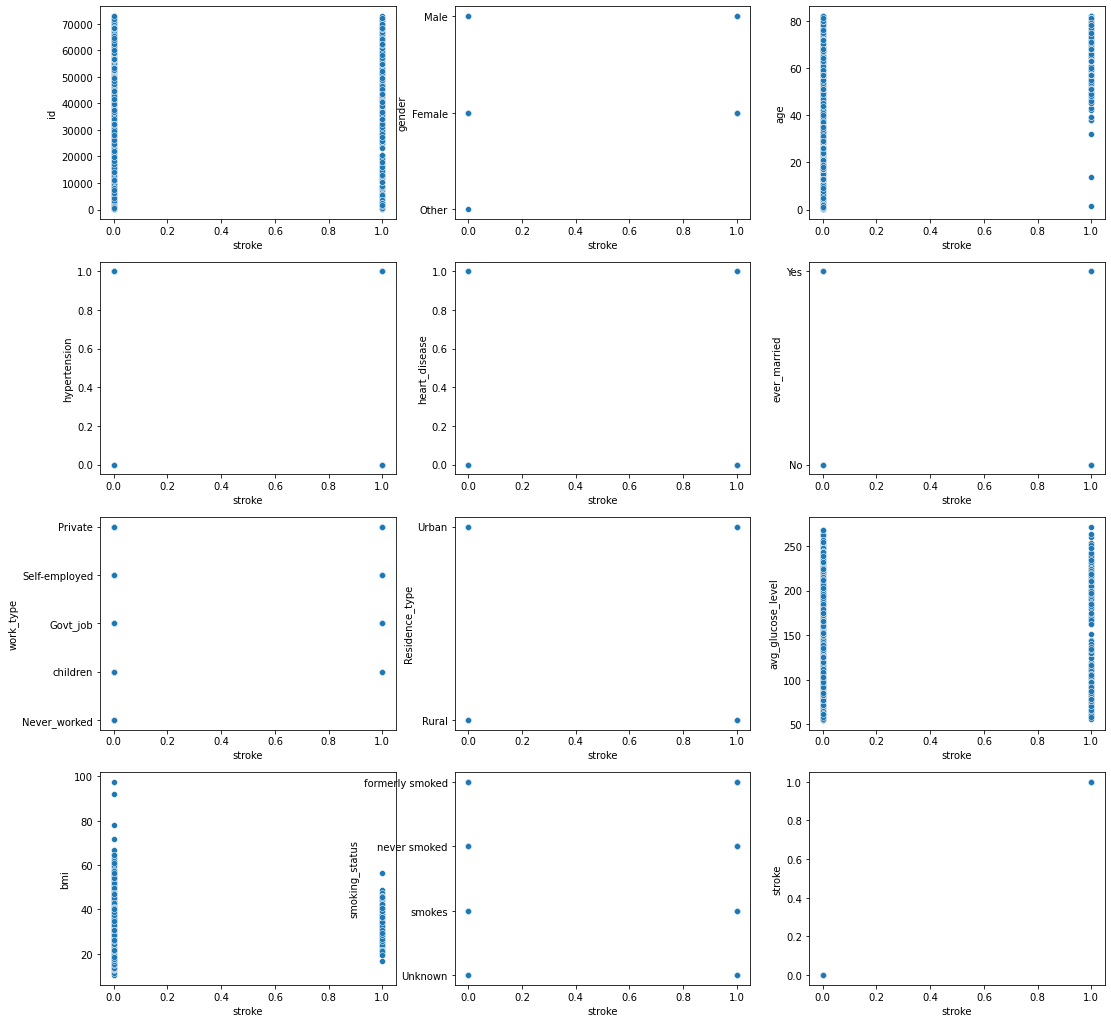

In [56]:
i=1
plt.figure(figsize = (18,18))
for col in data.columns:
    plt.subplot(4,3,i)
    sns.scatterplot(data=data,x='stroke',y=col)
    i+=1

Gambar di atas adalah gambar matrixplot. Kita bisa gunakan argumen annot=True untuk menampilkan korelasi antar atribut. Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi.

# FEATURE SELECTION

In [57]:
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['stroke']=le.fit_transform(data['stroke'])
data['ever_married']=le.fit_transform(data['ever_married'])
data['Residence_type']=le.fit_transform(data['Residence_type'])
data['smoking_status']=le.fit_transform(data['smoking_status'])
data['work_type']=le.fit_transform(data['work_type'])
data['bmi']=le.fit_transform(data['bmi'])
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,239,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,418,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,198,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,217,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,113,2,1


In [58]:
data.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,-0.068950,0.014074,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,0.001317,-0.062581,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.326959,0.265199,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.181732,0.111038,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.090682,0.048460,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.309074,0.259647,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.262838,-0.305927,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,0.006526,0.008237,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.196912,0.063437,0.131945
bmi,-0.068950,0.001317,0.326959,0.181732,0.090682,0.309074,-0.262838,0.006526,0.196912,1.000000,0.192084,0.114154


corr() digunakan untuk melihat hubungan 12 atribut.

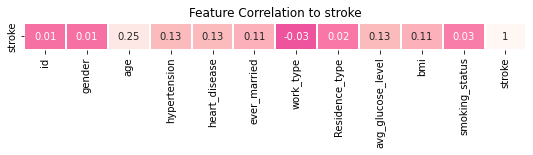

In [59]:
'''Plot Correlation to Target Variable only'''
def corrMat2(data,target='stroke',figsize=(9,0.5),ret_id=False):
    
    corr_mat = data.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, data.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0, 
                     cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Feature Correlation to {target}')
    
    if(ret_id):
        return corr
corrMat2(data)

Di situ, kami memeriksa korelasi antara fitur kami dengan variabel target. nilai korelasi berkisar dari 0 hingga 1.

<AxesSubplot:>

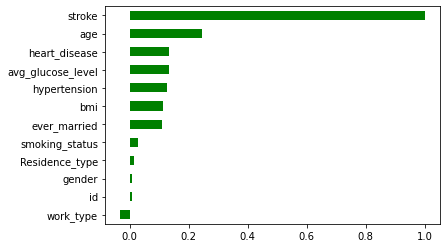

In [60]:
correlation=data.corr()['stroke'].sort_values()
correlation.plot(kind='barh',color='green')

<AxesSubplot:>

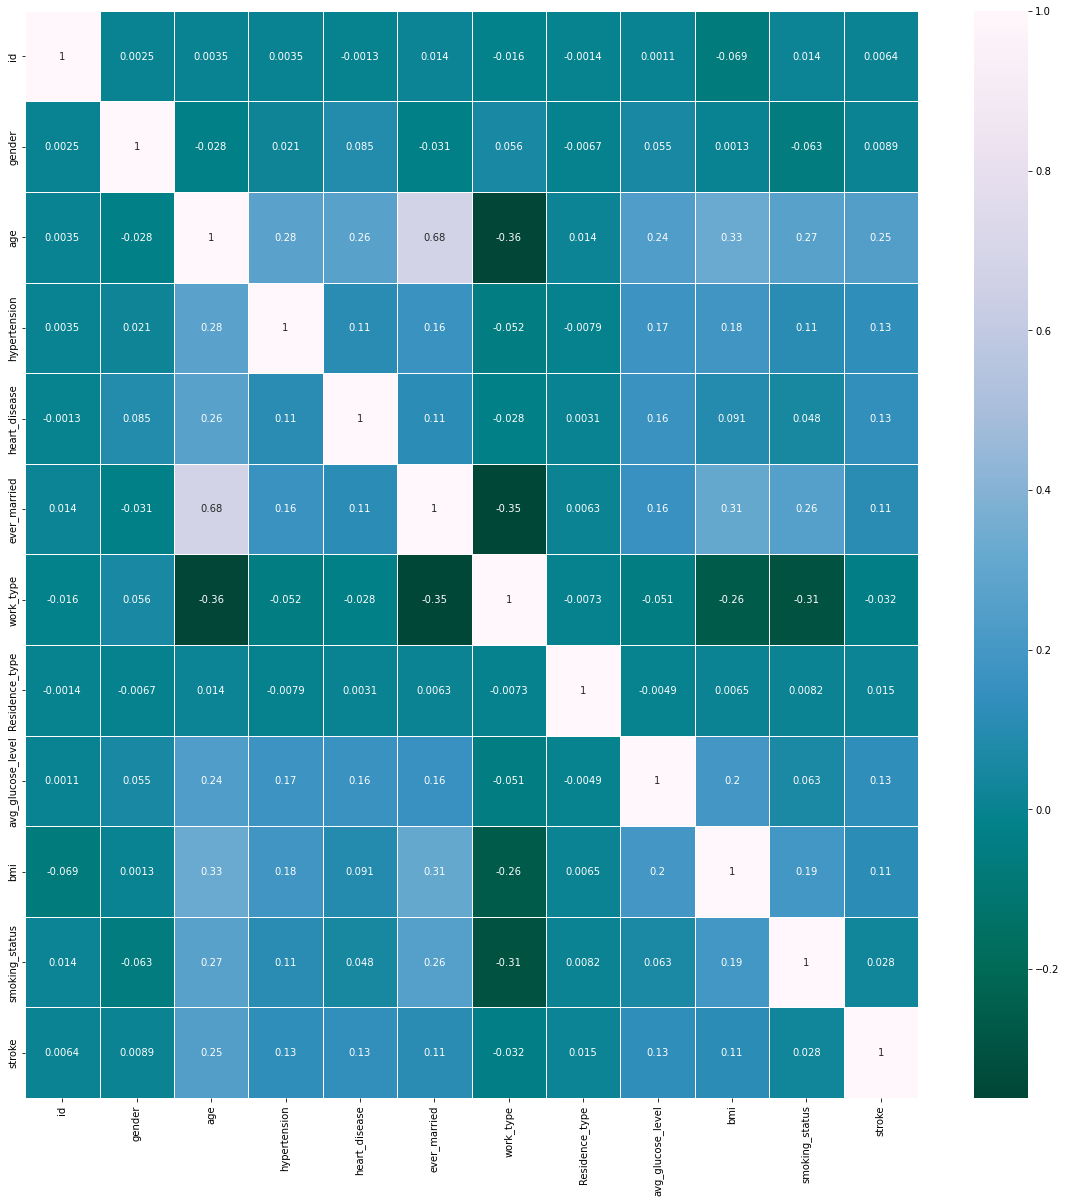

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),linewidths=1,cmap='PuBuGn_r',annot=True)

### UNTUK FEATURE CORELATION KIT MENGHILANGKAN 6 PARAMETER DAN SALAH SATUNYA OUTPUT
ID
GENDER
WORK_TYPE
SMOKING_STATUS
RESIDENCE_TYPE
STROKE (OUTPUT)


In [62]:
scaler = StandardScaler()
scaler.fit(data.drop(['work_type','id', 'gender','Residence_type','smoking_status','stroke'],axis = 1))

StandardScaler()

In [63]:
scaled_features = scaler.transform(data.drop(['work_type','id', 'gender','Residence_type','smoking_status','stroke'],axis = 1))

data.new = pd.DataFrame(scaled_features,columns = ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi'])
data.new.head()

C:\Users\isfahani\AppData\Local\Temp/ipykernel_2656/689136741.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.new = pd.DataFrame(scaled_features,columns = ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi'])


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
0,1.051434,-0.328602,4.185032,0.723884,2.706375,0.762262
1,0.786070,-0.328602,-0.238947,0.723884,2.121559,2.774560
2,1.626390,-0.328602,4.185032,0.723884,-0.005028,0.301344
3,0.255342,-0.328602,-0.238947,0.723884,1.437358,0.514940
4,1.582163,3.043196,-0.238947,0.723884,1.501184,-0.654216


In [64]:
X = data.new
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Disini kita mengimplementasikan train/test split.X dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target. Parameter test_size digunakan untuk mendefinisikan ukuran data testing. Diatas, test_size=0.2 berarti data yang digunakan sebagai data testing adalah sebesar 20% dari keseluruhan dataset.

In [65]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("accuracy:", metrics.accuracy_score(y_test, y_pred))

accuracy: 0.9207436399217221


Disini kita membuat Decision Tree Model menggunakan Scikit-learn.Dan kita juga dapat menghitung akurasi pengklasifikasian. Dapat diliat tingkat akurasinya yaitu 91.97% 

# CROOS VALIDATION

In [66]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print("="*50)
    print('Fold: %2d \nTraining/Test split Distribution: %s \nAccuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))  

Fold:  1 
Training/Test split Distribution: [3503  176] 
Accuracy: 0.892
Fold:  2 
Training/Test split Distribution: [3503  176] 
Accuracy: 0.902
Fold:  3 
Training/Test split Distribution: [3503  176] 
Accuracy: 0.917
Fold:  4 
Training/Test split Distribution: [3504  175] 
Accuracy: 0.936
Fold:  5 
Training/Test split Distribution: [3504  175] 
Accuracy: 0.910
Fold:  6 
Training/Test split Distribution: [3504  175] 
Accuracy: 0.912
Fold:  7 
Training/Test split Distribution: [3504  175] 
Accuracy: 0.922
Fold:  8 
Training/Test split Distribution: [3504  175] 
Accuracy: 0.912
Fold:  9 
Training/Test split Distribution: [3504  176] 
Accuracy: 0.919
Fold: 10 
Training/Test split Distribution: [3504  176] 
Accuracy: 0.902


Cross-Validation accuracy: 0.912 +/- 0.012


Dapat dilihat rata rata akurasi di setiap fold adalah 92%

###### CONFUSION MATRIX FOR CROSS VALIDATION

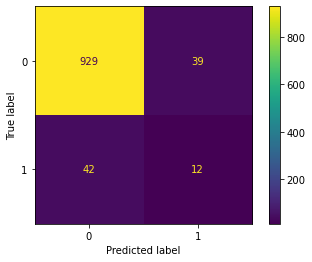

In [67]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

###### PERFORMANCE EVALUATION FOR CROOS VALIDATION

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       968
           1       0.24      0.22      0.23        54

    accuracy                           0.92      1022
   macro avg       0.60      0.59      0.59      1022
weighted avg       0.92      0.92      0.92      1022



# ENSAMBLE LEARNING

In [78]:
from sklearn.ensemble import RandomForestClassifier

clf_list = [('decision tree', DecisionTreeClassifier()), 
            ('logistic regression', LogisticRegression()), 
            ('knn', KNeighborsClassifier()), 
            ('naive bayes classifier', GaussianNB()),
            ('random forest', RandomForestClassifier())]

for model_tuple in clf_list:
    model = model_tuple[1]
    if 'random_state' in model.get_params().keys():
        model.set_params(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    print(f"{model_tuple[0]}'s accuracy: {acc:.2f}")

voting_clf = VotingClassifier(clf_list, voting = 'soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("\n")
print(f"Voting Classifier's accuracy: {accuracy_score(y_pred, y_test):.2f}")

decision tree's accuracy: 0.92
logistic regression's accuracy: 0.95
knn's accuracy: 0.95
naive bayes classifier's accuracy: 0.87
random forest's accuracy: 0.95


Voting Classifier's accuracy: 0.95


Berdasarkan analisis yang telah dilakukan dapat dilihat bahwa nilai akuransi analisis dengan menggunakan Regresi Logistik dan knn lebih tinggi dibandingan nilai akuransi analisis dengan menggunakan decision tree dan naive bayes.

###### KFOLD FOR ENSAMBLE LEARNING

In [79]:
pipeline = make_pipeline(StandardScaler(), VotingClassifier(clf_list, voting = 'soft'))

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print("="*50)
    print('Fold: %2d \nTraining/Test split Distribution: %s \nAccuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))  

Fold:  1 
Training/Test split Distribution: [3503  176] 
Accuracy: 0.936
Fold:  2 
Training/Test split Distribution: [3503  176] 
Accuracy: 0.934
Fold:  3 
Training/Test split Distribution: [3503  176] 
Accuracy: 0.954
Fold:  4 
Training/Test split Distribution: [3504  175] 
Accuracy: 0.949
Fold:  5 
Training/Test split Distribution: [3504  175] 
Accuracy: 0.951
Fold:  6 
Training/Test split Distribution: [3504  175] 
Accuracy: 0.946
Fold:  7 
Training/Test split Distribution: [3504  175] 
Accuracy: 0.939
Fold:  8 
Training/Test split Distribution: [3504  175] 
Accuracy: 0.946
Fold:  9 
Training/Test split Distribution: [3504  176] 
Accuracy: 0.949
Fold: 10 
Training/Test split Distribution: [3504  176] 
Accuracy: 0.946


Cross-Validation accuracy: 0.945 +/- 0.006


###### CONFUSION MATRIX FOR ENSAMBLE LEARNING

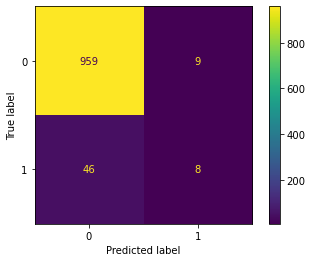

In [80]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

###### PERFORMANCE EVALUATION FOR ENSAMBLE LEARNING

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.47      0.15      0.23        54

    accuracy                           0.95      1022
   macro avg       0.71      0.57      0.60      1022
weighted avg       0.93      0.95      0.93      1022

